In [1]:
%matplotlib inline

from sklearn import datasets
#from sklearn.cross_validation import train_test_split
# This module will be removed in 0.20.
# Use :func:`sklearn.model_selection.train_test_split` instead.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import numpy as np

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
from matplotlib import style
from mylib.plotdregion import plot_decision_region

import matplotlib.pyplot as plt

style.use('seaborn-talk')

총 테스트 개수:45, 오류개수:2
정확도: 0.96


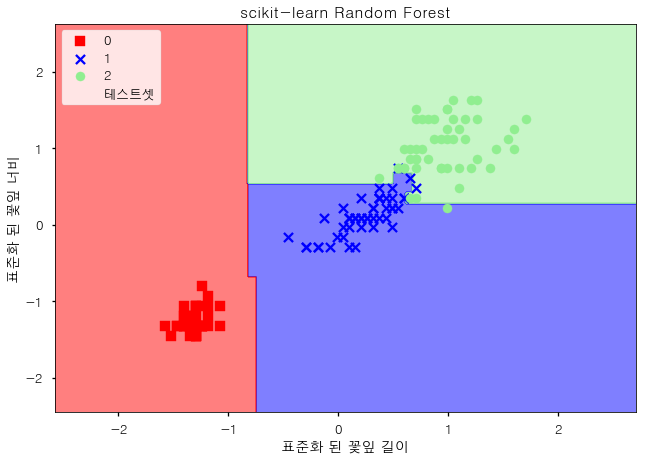

In [5]:
if __name__ == '__main__':
    
    # scikit-learn에는 아이리스에 대한 데이터를 자체적으로 가지고 있음.
    iris = datasets.load_iris()
    X = iris.data[:, [2,3]]
    y = iris.target
    
    # train_test_split는 원래 트레이닝 데이터와 결과값인 X와 y를 무작위로 섞은 후
    # test_size로 주어진 비율만큼 각각 배분함.
    # 예를 들어 test_size = 0.3으로 되어 있으면 X와 y를 무작위로 섞은 후에
    # 70%는 X_train과 y_train으로, 30%는 X_test, y_test로 둔다.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
    
    # StandardScaler()
    # : scikit-learn의 preprocessing 모듈이 제공하는 표준화를 적용하기 위한 클래스
    sc = StandardScaler()
    sc.fit(X_train) # X_train의 평균과 표준편차를 구함
    X_train_std = sc.transform(X_train) # 트레이닝 데이터를 표준화
    X_test_std = sc.transform(X_test) # 테스트 데이터를 표준화
    
    # Warning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. 
    # Use max_iter and tol instead
    # max_iter는 오류 발생함.
    # n_iter가 tol과 max_iter로 기능이 나뉘어 진 것으로 판단됨.
    # 하지만 n_iter의 기능을 그대로 가져오지는 않았음. 결과가 다름.
    # ml = Perceptron(eta0=0.01, n_iter=40, random_state=0)
    # ml = Perceptron(eta0=0.01, max_iter=40, random_state=0)
    # ml = Perceptron(eta0=0.01, tol=40, random_state=0)
    # 로지스틱 희귀(logistic regression) 코드
    # ml = LogisticRegression(C=1000.0, random_state=0)
    # SVM 코드
    # ml = SVC(kernel='linear', C=1.0, random_state=0)
    # gamma 값을 키우면 등고선이 더 고지대로 올라가는 느낌으로 데이터가 분류된다.
    # ml = SVC(kernel='rbf', C=10.0, gamma=0.10, random_state=0) # Radial Basic Function kernel(RBF 커널) -> 가우시안 커널이라고도 불린다.
    # 확률적 경사하강법
    # ml = SGDClassifier(loss='perceptron') # 확률적 경사하강법 적용 퍼셉트론
    # ml = SGDClassifier(loss='log')        # 확률적 경사하강법 적용 로지스틱 희귀
    # ml = SGDClassifier(loss='hinge')      # 확률적 경사하강법 적용 SVM
    # 의사결정트리(Decision tree learning)
    # ml = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
    # 랜덤 포레스트(Random Forest)
    # n_estimators : 앙상블을 위해 생성할 의사결정트리의 갯수
    # n_jobs : 학습을 수행하기 위해 사용할 CPU 코어의 갯수
    ml = RandomForestClassifier(criterion='entropy', n_estimators=10, n_jobs=1, random_state=1)
    ml.fit(X_train_std, y_train)
    
    # 퍼셉트론으로 머신러닝을 수행한 후 X_test_std를 이용해서 이에 대한 예측값을 계산힘.
    # 이 후 y_pred에 저장.
    y_pred = ml.predict(X_test_std)
    
    print('총 테스트 개수:%d, 오류개수:%d' %(len(y_test), (y_test != y_pred).sum()))
    print('정확도: %.2f' %accuracy_score(y_test, y_pred))
    
    X_combined_std = np.vstack((X_train_std, X_test_std))
    y_combined = np.hstack((y_train, y_test))
    plot_decision_region(X=X_combined_std, y=y_combined, classifier=ml, test_idx=range(105, 150), title='scikit-learn Random Forest')
    